<div style="background-color:#E3F4F4; font-weight:bold; color:black; text-align:center">
    <h1>NOUHAILA DRAIDAR</h1>
    <h1>CLASSIFICATION : CHESS GAMES</h1>
</div>

<div style="background-color:#F9F5F6;text-align:center">
    <h3>IMPORTING THE INITIAL LIBRARIES</h3>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cufflinks as cf
import plotly.express as px
import matplotlib.pylab as plt
from pandas.api.types import CategoricalDtype
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

<div style="background-color:#F9F5F6;text-align:center">
    <h3>IMPORTING THE DATASET</h3>
</div>

In [2]:
df = pd.read_csv('chess_games.csv')
df.head(1)

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation


game_id: A unique identifier for each chess game in the dataset.
    
rated: A boolean variable indicating whether the game is rated (True) or not rated (False).
    
turns: The total number of turns or moves played in the game.
    
victory_status: The outcome or status of the game, which can be one of the following: "Out of Time" (when a player runs out of time), "Resign" (when a player resigns), or "Mate" (when a player achieves checkmate).

winner: The player who won the game, which can be either "White" or "Black".
    
time_increment: The time increment or time control for each move in the game. It specifies the initial time and the additional time added per move.

white_id: The identifier or username of the White player.
    
white_rating: The rating or skill level of the White player.
    
black_id: The identifier or username of the Black player.
    
black_rating: The rating or skill level of the Black player.
    
moves: The sequence of moves made during the game, typically represented using algebraic notation.
    
opening_code: A code representing the opening variation played in the game.
    
opening_moves: The number of moves played in the opening phase of the game.
    
opening_fullname: The full name of the opening variation.

opening_shortname: A shorter name or abbreviation of the opening variation.
    
opening_response: The response or variation played by the opponent in the opening.
    
opening_variation: Additional information or details about the opening variation, if available.
    

In [3]:
df.shape

(20058, 17)

<div style="background-color:#F9F5F6;text-align:center">
    <h3>Splitting the dataframe into training and test sets</h3>
</div>

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, shuffle=True)

In [5]:
print("df_train.shape",df_train.shape)
print("df_test.shape",df_test.shape)

df_train.shape (15043, 17)
df_test.shape (5015, 17)


<div style="background-color:#F9F5F6;text-align:center">
    <h3>Chess Analysis: EDA & Visualization</h3>
</div>

<div style="background-color:#F9FBE7;color:;text-align:center"> Drop black_id, game_id and white_id because it's not relevant to our study </div>

In [6]:
df_train.drop(['white_id','black_id','game_id','opening_fullname'],axis=1, inplace=True)
df_train.head(1)

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,moves,opening_code,opening_moves,opening_shortname,opening_response,opening_variation
3132,True,118,Draw,Draw,7+4,2155,1758,e4 e6 b3 Nc6 Bb2 b6 Nf3 Bb7 Nc3 Nge7 g3 f5 Bg2...,C00,3,French Defense,NaN,Horwitz Attack


In [7]:
df_train.shape

(15043, 13)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15043 entries, 3132 to 16893
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rated              15043 non-null  bool  
 1   turns              15043 non-null  int64 
 2   victory_status     15043 non-null  object
 3   winner             15043 non-null  object
 4   time_increment     15043 non-null  object
 5   white_rating       15043 non-null  int64 
 6   black_rating       15043 non-null  int64 
 7   moves              15043 non-null  object
 8   opening_code       15043 non-null  object
 9   opening_moves      15043 non-null  int64 
 10  opening_shortname  15043 non-null  object
 11  opening_response   902 non-null    object
 12  opening_variation  10845 non-null  object
dtypes: bool(1), int64(4), object(8)
memory usage: 1.5+ MB


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
turns,15043.0,60.245164,33.367204,1.0,37.0,55.0,78.0,259.0
white_rating,15043.0,1597.462740,291.488714,784.0,1399.0,1567.0,1792.0,2700.0
black_rating,15043.0,1588.754570,289.735834,791.0,1392.0,1562.0,1783.0,2723.0
opening_moves,15043.0,4.809546,2.790011,1.0,3.0,4.0,6.0,28.0


In [10]:
df_train.isnull().sum()

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_rating             0
black_rating             0
moves                    0
opening_code             0
opening_moves            0
opening_shortname        0
opening_response     14141
opening_variation     4198
dtype: int64

<div style="background-color:#F9FBE7;color:;text-align:center"> we notice that there are a lot of null values in opening_response & opening_variation </div>

In [11]:
# Calculate the percentage of missing values in each column
print(df_train[['opening_response', 'opening_variation']].isnull().mean() * 100)

opening_response     94.003856
opening_variation    27.906668
dtype: float64


In [12]:
df_train['opening_response'].value_counts()

Declined    381
Accepted    327
Refused     194
Name: opening_response, dtype: int64

In [13]:
df_train['opening_variation'].value_counts()

#2                            606
Exchange Variation            334
Classical Variation           317
Normal Variation              284
Bowdler Attack                230
                             ... 
Cormorant Gambit                1
Gurgenidze System               1
The Walrus                      1
Three Knights Variation #2      1
King Knight's Gambit            1
Name: opening_variation, Length: 577, dtype: int64

In [14]:
df_train['opening_variation']=df_train['opening_variation'].fillna('Unknown')
df_train['opening_response']=df_train['opening_response'].fillna('Random_Response')

In [15]:
df_train.isnull().sum()

rated                0
turns                0
victory_status       0
winner               0
time_increment       0
white_rating         0
black_rating         0
moves                0
opening_code         0
opening_moves        0
opening_shortname    0
opening_response     0
opening_variation    0
dtype: int64

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">What is the percentage of wins of black and white players in the games?
</div>

In [16]:
sns.set_style("whitegrid")
fig=px.pie(df_train["winner"].value_counts(),names=df_train["winner"].value_counts().index,values=df["winner"].value_counts().values,
           title="Winners",
            color_discrete_sequence=["#C1D0B5","#17202A"," #FFD8A9"],
           labels={"names":"Player","values":"Num of Games"}
      )
fig.update_layout(
title_font_color="#2E383F",paper_bgcolor="#ECECEB",title_font_size=18,title_x=.45,font_color="#2E383F",
    plot_bgcolor="#D0D3D4",legend_title_font_size=15,legend_title_font_color="#2E383F",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>Games won by white players are slightly more than games won by black players.</li>
</div>   

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">Is winning influenced by the opening response?
</div>

In [17]:
sns.set_style("whitegrid")
fig = px.histogram(df_train, x="opening_response", color="winner", barmode="group",
                   title="Winners by Opening Response",
                   color_discrete_sequence=["#C1D0B5", "#17202A", "#FFD8A9"],
                   labels={"opening_response": "Opening Response", "winner": "Winner"})
fig.update_layout(
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4", legend_title_font_size=15, legend_title_font_color="#2E383F",
    legend_title_text="Game Winner")
fig.update_yaxes(showgrid=False, visible=False, title="Count")
fig.update_xaxes(tickfont_size=9)
fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>Most winners have random responses.</li>
    <li>Most winners are white independently on the opening response.</li>
    <li>Declined, Refused and accepted responses never end up with a draw.</li>
</div>   

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">What is the most frequent victory status?</div>

In [18]:
sns.set_style("whitegrid")
fig = px.histogram(df_train, x="victory_status", color="winner", barmode="group",
                   title="Distribution of Winners by Victory Status",
                   color_discrete_sequence=["#C1D0B5", "#17202A", "#FFD8A9"],
                   labels={"victory_status": "Victory Status", "winner": "Winner"})
fig.update_layout(
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4", legend_title_font_size=15, legend_title_font_color="#2E383F",
    legend_title_text="Game Winner")
fig.update_yaxes(showgrid=False, visible=False, title="Count")
fig.update_xaxes(tickfont_size=9)
fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>White players have more chances to win.</li>
    <li>Most wins are because of the resign of the opponent.</li>
</div>

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">When do the black players win and how?</div>

In [19]:
# Subset the data for black winners
black_winners = df_train[df_train['winner'] == 'Black']

In [20]:
sns.set_style("whitegrid")

# Distribution of victory status for black winners
fig = px.histogram(black_winners, x="victory_status", color_discrete_sequence=["#17202A"], barmode="group",
                   title="Distribution of Victory Status for Black Winners",
                   labels={"victory_status": "Victory Status", "count": "Count"})
fig.update_layout(
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4")
fig.update_xaxes(tickfont_size=9)
fig.show()

# Distribution of opening response for black winners
fig = px.histogram(black_winners, x="opening_response", color_discrete_sequence=["#17202A"], barmode="group",
                   title="Distribution of Opening Response for Black Winners",
                   labels={"opening_response": "Opening Response", "count": "Count"})
fig.update_layout(
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4")
fig.update_xaxes(tickfont_size=9)
fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>Most black winners won because the white opponent resigned.</li>
    <li>Most black wins had random responses.</li>
</div>

In [21]:
sns.set_style("whitegrid")

# Get the top 10 most common opening variations for black winners
top_opening_variations = black_winners['opening_variation'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 opening variations
top_variations_data = black_winners[black_winners['opening_variation'].isin(top_opening_variations)]

# Plot the distribution of the top 5 opening variations for black winners
fig = px.histogram(top_variations_data, x="opening_variation", color_discrete_sequence=["#17202A"], barmode="group",
                   title="Top 10 Opening Variations for Black Winners",
                   labels={"opening_variation": "Opening Variation", "count": "Count"})
fig.update_layout(
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4")
fig.update_xaxes(tickfont_size=9)
fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>Most black winners played unknown opening variations.</li>
</div>

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">Does this apply on all players no matter their level?</div>

In [22]:
#Assign levels to the players
def assign_level(rating):
    if rating >= 2400:
        return "Grandmaster"
    elif rating >= 2200:
        return "International Master"
    elif rating >= 2000:
        return "FIDE Master"
    elif rating >= 1800:
        return "Candidate Master"
    else:
        return "Amateur"

df_train['white_level'] = df_train['white_rating'].apply(assign_level)
df_train['black_level'] = df_train['black_rating'].apply(assign_level)

In [23]:
white_winners = df_train[df_train['winner'] == 'White']

white_winners_counts =white_winners['white_level'].value_counts().to_frame().reset_index()
black_winners_counts = white_winners['black_level'].value_counts().to_frame().reset_index()

white_winners_counts.columns = ['Level', 'White winners']
black_winners_counts.columns = ['Level', 'Black winners']

level_counts = pd.merge(white_winners_counts, black_winners_counts, on='Level', how='outer')
level_counts = level_counts.set_index('Level')

level_counts

,White winners,Black winners
Level,,
Amateur,5469,6101
Candidate Master,1204,989
FIDE Master,531,329
International Master,247,92
Grandmaster,67,7


In [24]:
sns.set_style("whitegrid")
fig = px.bar(level_counts, x=level_counts.index, y=['White winners', 'Black winners'], barmode='group',
             title='Distribution of Player Levels in Black and White Winners',
             color_discrete_sequence=["#C1D0B5", "#17202A"],
             labels={"index": "Level", "value": "Count", "variable": "Player"})
fig.update_layout(
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4", legend_title_font_size=15, legend_title_font_color="#2E383F",
    legend_title_text="Player")
fig.update_xaxes(tickfont_size=9)
fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>In amateur level, Black players win more than white players.</li>
    <li>the more advanced the level becomes, the more games white players win</li>
</div>

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">Does the rank of the player matter?</div>

In [25]:
#create dataframe to display the winner and the ranks of the two players
df_rank=df_train[["winner","white_rating","black_rating"]].rename(columns={"white_rating":"white","black_rating":"black"})

#Add a column that contains a boolean value that is true if the white rank is greater than the black one and false otherwise
df_rank["white_rank>black_rank"]=(df_rank["white"] > df_rank["black"])

#Add a column whose value == higher rank win win if the higher rank wins and == lower rank win otherwise
mask=((df_rank["winner"]=="White" )& (df_rank["white_rank>black_rank"]==True)) | ((df_rank["winner"]=="Black") & (df_rank["white_rank>black_rank"]==False))
df_rank["winner_rank"]="lower rank win"
df_rank.loc[mask,"winner_rank"]="higher rank win"
df_rank.head(2)

,winner,white,black,white_rank>black_rank,winner_rank
3132,Draw,2155,1758,True,lower rank win
5086,White,1500,1414,True,higher rank win


In [26]:
import plotly.graph_objects as go

sns.set_style("whitegrid")

winner_rank_counts = df_rank["winner_rank"].value_counts()

fig = go.Figure(data=[go.Pie(labels=winner_rank_counts.index, values=winner_rank_counts,
                             marker=dict(colors=["#C1D0B5", "#17202A"], line=dict(color="rgba(0,0,0,0)")))])

fig.update_layout(
    title="Distribution of Winners by Rank",
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4", legend_title_font_size=15, legend_title_font_color="#2E383F",
    legend_title_text="Winner Rank"
)

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)
fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>Logically, higher ranks win 61.8% more than lower ranks </li>
    <li>There is however 38.2% of lower ranks that win a higher rank player</li>
</div>

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">But how do these lower ranks win?</div>

In [27]:
#add a column that shows the victory status of the game
df_rank['status']=df_train['victory_status']
df_rank.head(2)

,winner,white,black,white_rank>black_rank,winner_rank,status
3132,Draw,2155,1758,True,lower rank win,Draw
5086,White,1500,1414,True,higher rank win,Mate


In [28]:
#How do the lower ranks win?
sns.set_style("whitegrid")

lower_rank_wins = df_rank[df_rank["winner_rank"] == "lower rank win"]

victory_status_counts = lower_rank_wins["status"].value_counts()

fig = go.Figure(data=[go.Pie(labels=victory_status_counts.index, values=victory_status_counts,
                             marker=dict(colors=["#C1D0B5", "#17202A", "#FF9A76", "#62929A"]))])

fig.update_layout(
    title="Result of Victory Status (Lower Rank Wins)",
    title_font_color="#2E383F", paper_bgcolor="#ECECEB", title_font_size=18, title_x=0.45, font_color="#2E383F",
    plot_bgcolor="#D0D3D4", legend_title_font_size=15, legend_title_font_color="#2E383F",
    legend_title_text="Victory Status"
)

fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=12)

fig.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
    We notice that : 
    <li>The majority of the lower ranks wins were because the opponent resigned</li>
    <li>in 28% of the games, lower ranks won with Mate </li>
</div>

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">Which opening move was most frequently used by the winner of the game?</div>

In [29]:
df_train["opening_move"]=df_train["moves"].str.slice(0,2)
df_train.head(1)

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,moves,opening_code,opening_moves,opening_shortname,opening_response,opening_variation,white_level,black_level,opening_move
3132,True,118,Draw,Draw,7+4,2155,1758,e4 e6 b3 Nc6 Bb2 b6 Nf3 Bb7 Nc3 Nge7 g3 f5 Bg2...,C00,3,French Defense,Random_Response,Horwitz Attack,FIDE Master,Amateur,e4


In [30]:
unknown_opening_moves = df_train[df_train["opening_variation"] == "Unknown"]["opening_move"].value_counts()

fig=px.bar(y=unknown_opening_moves.index,x=unknown_opening_moves.values,
           title="most used oppening moves".title(),
            color_discrete_sequence=["#FF9A76"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#2E383F",paper_bgcolor="#ECECEB",title_font_size=20,title_x=.5,font_color="#2E383F",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#2E383F",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#2E383F")
fig.update_xaxes(showgrid=False,tickfont_size=9)
fig.update_traces(textfont_size=1,visible=True)
fig.update_traces(textfont_color="#333",textposition='inside')
fig.show()

In [31]:
white=df_train[df_train["winner"]=="White"].opening_move.value_counts().nlargest(10)

fig=px.bar(y=white.index,x=white.values,
           title="most used oppening moves, white wins".title(),
            color_discrete_sequence=["#FF9A76"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#2E383F",paper_bgcolor="#ECECEB",title_font_size=20,title_x=.5,font_color="#2E383F",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#2E383F",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#2E383F")
fig.update_xaxes(showgrid=False,tickfont_size=9)
fig.update_traces(textfont_size=1,visible=True)
fig.update_traces(textfont_color="#333",textposition='inside')
fig.show()

In [32]:
black=df_train[df_train["winner"]=="Black"].opening_move.value_counts().nlargest(10)

fig=px.bar(y=black.index,x=black.values,
           title="most used oppening moves, black wins".title(),
            color_discrete_sequence=["#FF9A76"],
           labels={"x":"Count ","y":"Move "},
      )
fig.update_layout(
title_font_color="#2E383F",paper_bgcolor="#ECECEB",title_font_size=20,title_x=.5,font_color="#2E383F",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#2E383F",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#2E383F")
fig.update_xaxes(showgrid=False,tickfont_size=9)
fig.update_traces(textfont_size=1,visible=True)
fig.update_traces(textfont_color="#333",textposition='inside')
fig.show()

<div style="background-color:#F9FBE7; font-weight:bold; color:black; text-align:center">Which opening was most used by players?</div>

In [33]:
opening=df_train["opening_shortname"].value_counts().nlargest(10)

fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
            color_discrete_sequence=["#17202A"],
           labels={"x":"Count ","y":"Move "},
           text=opening.values
      )
fig.update_layout(
title_font_color="#2E383F",paper_bgcolor="#ECECEB",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#2E383F",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#2E383F")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=False)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()

<div style="background-color:#F9F5F6;text-align:center">
    <h3>PRE-PROCESSING OF THE DATA</h3>
</div>

<div style="background-color:#ECECEB;text-align:center">
    <h3>Encoding</h3>
</div>

In [34]:
from sklearn.preprocessing import LabelEncoder
print(df_train['winner'].value_counts())

lb_win = LabelEncoder()
df_train['winner'] = lb_win.fit_transform(df_train['winner'])

print(df_train['winner'].value_counts())

White    7518
Black    6805
Draw      720
Name: winner, dtype: int64
2    7518
0    6805
1     720
Name: winner, dtype: int64


In [35]:
print(df_train['rated'].value_counts())

lb_rated= LabelEncoder()
df_train['rated'] = lb_rated.fit_transform(df_train['rated'])

print(df_train['rated'].value_counts())

True     12093
False     2950
Name: rated, dtype: int64
1    12093
0     2950
Name: rated, dtype: int64


In [36]:
# Replace the values in the 'victory_status' column with numerical codes
df_train['victory_status'] = df_train['victory_status'].replace({
    'Out of Time': 0,
    'Resign': 1,
    'Mate': 2,
    'Draw': 3
})

In [37]:
# Replace the values in the 'victory_status' column with numerical codes
df_train['opening_response'] = df_train['opening_response'].replace({
    'Random_Response': 0,
    'Declined': 1,
    'Refused': 2,
    'Accepted': 3,
})

In [38]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Fit the encoder on the 'opening_move' column and transform it
df_train['opening_move'] = one_hot_encoder.fit_transform(df_train[['opening_move']])

In [39]:
df_train['opening_move'].value_counts()

0.0    15041
1.0        2
Name: opening_move, dtype: int64

In [40]:
lb_blevel= LabelEncoder()
df_train['black_level'] = lb_blevel.fit_transform(df_train['black_level'])

In [41]:
lb_wlevel= LabelEncoder()
df_train['white_level'] = lb_wlevel.fit_transform(df_train['white_level'])

In [42]:
#add a column : number of moves in a game
df_train['total_moves'] = df_train['moves'].apply(lambda x: len(x.split()))
df_train.head(1)

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,moves,opening_code,opening_moves,opening_shortname,opening_response,opening_variation,white_level,black_level,opening_move,total_moves
3132,1,118,3,1,7+4,2155,1758,e4 e6 b3 Nc6 Bb2 b6 Nf3 Bb7 Nc3 Nge7 g3 f5 Bg2...,C00,3,French Defense,0,Horwitz Attack,2,0,0.0,118


<div style="background-color:#ECECEB;text-align:center">
    <h3>Numerical data</h3>
</div>

In [43]:
df_num=df_train[['total_moves','opening_response','opening_moves','opening_move','turns','rated','white_rating','white_level','black_level','black_rating','victory_status','winner']]

In [44]:
df_num.head()

,total_moves,opening_response,opening_moves,opening_move,turns,rated,white_rating,white_level,black_level,black_rating,victory_status,winner
3132,118,0,3,0.0,118,1,2155,2,0,1758,3,1
5086,123,0,8,0.0,123,0,1500,0,0,1414,2,2
13122,51,1,7,0.0,51,0,1917,1,1,1804,1,0
15170,76,0,4,0.0,76,1,1491,0,0,1485,1,0
8181,39,0,5,0.0,39,1,1939,1,0,1781,1,2


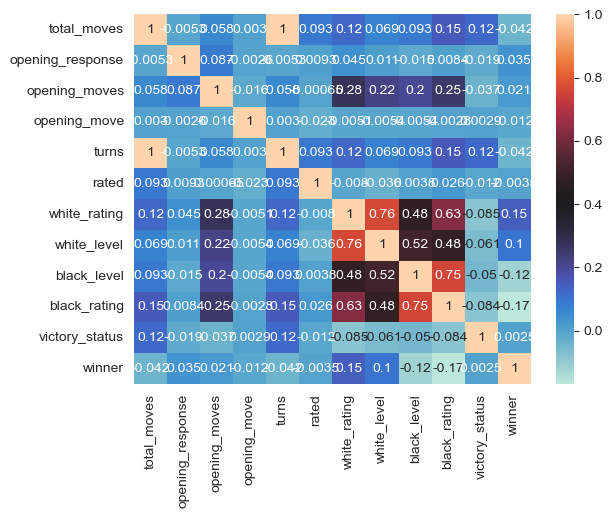

In [45]:
sns.heatmap(df_num.corr(), annot=True, cmap='icefire')
plt.show()

<div style="background-color:#FFEADB; font-weight:bold; color:black">
We notice that the correlation between white level and white rating and the black rating and black level is important, which is very logical because we created the clumns 'level' from 'rating'. So we can keep the level and drop the rating.   
<br>   
Also, we notice the correlation between 'total moves' and turns is equal to 1, so we can drop one of them. We choose to drop 'total moves' since it's the newest column.
</div>

In [46]:
df_num = df_train[['opening_response', 'opening_moves', 'opening_move', 'turns', 'rated', 'white_level', 'black_level', 'victory_status', 'winner']]
df_num.head(2)

,opening_response,opening_moves,opening_move,turns,rated,white_level,black_level,victory_status,winner
3132,0,3,0.0,118,1,2,0,3,1
5086,0,8,0.0,123,0,0,0,2,2


<div style="background-color:#ECECEB;text-align:center">
    <h3>Scaling</h3>
</div>

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 3))

# Fit and transform the selected features
df_num[['opening_moves','turns']] = scaler.fit_transform(df_num[['opening_moves','turns']])
df_num.head(2)

,opening_response,opening_moves,opening_move,turns,rated,white_level,black_level,victory_status,winner
3132,0,0.222222,0.0,1.360465,1,2,0,3,1
5086,0,0.777778,0.0,1.418605,0,0,0,2,2


<div style="background-color:#ECECEB;text-align:center">
    <h3>Splitting data</h3>
</div>

In [48]:
from sklearn.model_selection import train_test_split

# Split the scaled data into input variables (X) and target variable (y)
X_train = df_num.drop('winner', axis=1)  
y_train = df_num['winner']

<div style="background-color:#F9F5F6;text-align:center">
    <h3>MODEL CHOICE-CROSS VALIDATION</h3>
</div>

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



# Define the classification algorithms
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machines': SVC(),
    'Neural Networks': MLPClassifier()
}

# Apply cross-validation
for classifier_name, classifier in classifiers.items():
    scores = cross_val_score(classifier, df_num[['opening_moves','turns']], y_train.astype('int'), cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    print(f"{classifier_name}: Mean Accuracy = {mean_accuracy}")

Logistic Regression: Mean Accuracy = 0.500631880952886
Random Forest: Mean Accuracy = 0.8171237616936423


KeyboardInterrupt: 

<div style="background-color:#FFEADB; font-weight:bold; color:black">
Based on the cross-validation results, the Random Forest algorithm has the highest mean accuracy with a score of 0.817.<br> 
This suggests that the Random Forest model may perform better than the other algorithms on our dataset.
</div>

<div style="background-color:#F9F5F6;text-align:center">
    <h3>TESTING SET: PREPROCESSING</h3>
</div>

Now, let's reproduce all the data preprocessing on the training set

In [ ]:
df_test.drop(['white_id','black_id','game_id','opening_fullname'],axis=1, inplace=True)

In [ ]:
df_test.shape

In [52]:
df_test['opening_variation']=df_test['opening_variation'].fillna('Unknown')
df_test['opening_response']=df_test['opening_response'].fillna('Random_Response')

lb_win = LabelEncoder()
df_test['winner'] = lb_win.fit_transform(df_test['winner'])

lb_rated= LabelEncoder()
df_test['rated'] = lb_rated.fit_transform(df_test['rated'])

df_test['victory_status'] = df_test['victory_status'].replace({
    'Out of Time': 0,
    'Resign': 1,
    'Mate': 2,
    'Draw': 3
})

df_test['opening_response'] = df_test['opening_response'].replace({
    'Random_Response': 0,
    'Declined': 1,
    'Refused': 2,
    'Accepted': 3,
})

df_test["opening_move"]=df_test["moves"].str.slice(0,2)
one_hot_encoder = OneHotEncoder(sparse=False)
df_test['opening_move'] = one_hot_encoder.fit_transform(df_test[['opening_move']])

df_test['white_level'] = df_test['white_rating'].apply(assign_level)
df_test['black_level'] = df_test['black_rating'].apply(assign_level)

lb_blevel= LabelEncoder()
df_test['black_level'] = lb_blevel.fit_transform(df_test['black_level'])

lb_wlevel= LabelEncoder()
df_test['white_level'] = lb_wlevel.fit_transform(df_test['white_level'])

df_test['total_moves'] = df_test['moves'].apply(lambda x: len(x.split()))

In [53]:
df_num_test = df_test[['opening_response', 'opening_moves', 'opening_move', 'turns', 'rated', 'white_level', 'black_level', 'victory_status', 'winner']]
df_num_test.head(2)

,opening_response,opening_moves,opening_move,turns,rated,white_level,black_level,victory_status,winner
19483,0,3,0.0,107,1,0,0,2,2
3170,0,1,0.0,73,1,0,0,0,2


<div style="background-color:#ECECEB;text-align:center">
    <h3>Splitting test data</h3>
</div>

In [54]:
X_test= df_num_test.drop('winner', axis=1)  
y_test= df_num_test['winner']

In [55]:
scaler.fit(df_num[['opening_moves','turns']])
df_num_test[['opening_moves','turns']] = scaler.transform(df_num_test[['opening_moves','turns']])
df_num_test.head(1)

,opening_response,opening_moves,opening_move,turns,rated,white_level,black_level,victory_status,winner
19483,0,3.0,0.0,107.0,1,0,0,2,2


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf_classifier = RandomForestClassifier()

# Train the random forest classifier on the training dataset
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test dataset
y_pred = rf_classifier.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.63      0.55      2304
           1       0.98      0.95      0.97       252
           2       0.52      0.37      0.43      2459

    accuracy                           0.52      5015
   macro avg       0.66      0.65      0.65      5015
weighted avg       0.53      0.52      0.51      5015



In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)


Accuracy: 0.5194416749750748
Precision: 0.6613971616039279
Recall: 0.6512563313473235
F1 Score: 0.649104764226967


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.7191384401759262


The best score achieved with these parameters is 0.7218, which indicates the accuracy of the model.

In [60]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (15043, 8) (15043,)
Test set: (5015, 8) (5015,)


In [73]:
from keras.models import Sequential
from keras.layers import Dense



from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_dim=8, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid))

model.add(Dense(1, activation='sigmoid'))

# Assign a custom loss function that suits your needs
def custom_loss(y_true, y_pred):
    # Apply threshold to y_pred to convert probabilities to binary predictions
    y_pred_binary = tf.cast(tf.greater(y_pred, threshold), tf.float32)
    
    # Calculate true positives, false negatives, and false positives
    true_positives = tf.reduce_sum(y_true * y_pred_binary)
    false_negatives = tf.reduce_sum(y_true * (1 - y_pred_binary))
    false_positives = tf.reduce_sum((1 - y_true) * y_pred_binary)
    
    # Calculate recall
    recall = true_positives / (true_positives + false_negatives)
    
    # Use recall as the loss value
    loss = 1 - recall
    
    return loss

model.compile(loss=custom_loss, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [74]:
myloss = tf.keras.losses.BinaryCrossentropy()
optim = tf.keras.optimizers.Adam(learning_rate=0.5)
metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]

model.compile(optimizer = optim, loss = myloss, metrics = metrics)

In [75]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
377/377 [==============================] - 7s 10ms/step - loss: -1316798332928.0000 - accuracy: 0.0483 - precision_2: 0.5466 - recall_2: 0.9968 - val_loss: -9180255617024.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 2/200
377/377 [==============================] - 2s 6ms/step - loss: -65056855293952.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -206965313634304.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 3/200
377/377 [==============================] - 2s 6ms/step - loss: -406137643991040.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -906102606659584.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 4/200
377/377 [==============================] - 2s 6ms/step - loss: -1402996701265920.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -2648232274427904.0000 - val_accuracy: 0.0425

377/377 [==============================] - 2s 6ms/step - loss: -16332471174426525696.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -19816150621732470784.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 62/200
377/377 [==============================] - 2s 5ms/step - loss: -17230485201784668160.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -20899239943836008448.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 63/200
377/377 [==============================] - 2s 5ms/step - loss: -18188942681856540672.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -22045359869513433088.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 64/200
377/377 [==============================] - 2s 6ms/step - loss: -19191544454271991808.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -232835243115984

Epoch 91/200
377/377 [==============================] - 2s 5ms/step - loss: -63234180350792957952.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -76117219666095505408.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 92/200
377/377 [==============================] - 2s 5ms/step - loss: -65713442731985993728.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -79043275194305085440.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 93/200
377/377 [==============================] - 2s 6ms/step - loss: -68281703982377730048.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -82171130688630161408.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 94/200
377/377 [==============================] - 2s 6ms/step - loss: -70946080141223133184.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -85

Epoch 178/200
377/377 [==============================] - 2s 6ms/step - loss: -689071853610939187200.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -821862810792516124672.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 179/200
377/377 [==============================] - 2s 6ms/step - loss: -703252492568877858816.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -838840044381563518976.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 180/200
377/377 [==============================] - 2s 6ms/step - loss: -717650782052558045184.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -855768230955919081472.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 181/200
377/377 [==============================] - 2s 6ms/step - loss: -732215634353706762240.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - va

In [77]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
377/377 [==============================] - 3s 7ms/step - loss: -1068143845265131962368.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -1272445772079864741888.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 2/200
377/377 [==============================] - 2s 6ms/step - loss: -1087792839333116903424.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -1295559230529948614656.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 3/200
377/377 [==============================] - 2s 6ms/step - loss: -1106863543061449801728.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -1318185596532834697216.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 4/200
377/377 [==============================] - 2s 6ms/step - loss: -1126778108769961246720.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val

377/377 [==============================] - 2s 6ms/step - loss: -2721616452712444985344.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -3235955959130803404800.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 60/200
377/377 [==============================] - 2s 6ms/step - loss: -2760281825838257668096.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -3281762070940788719616.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 61/200
377/377 [==============================] - 2s 6ms/step - loss: -2798850371572081885184.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -3327916648771941826560.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 62/200
377/377 [==============================] - 2s 6ms/step - loss: -2838722427923053150208.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -3

377/377 [==============================] - 3s 7ms/step - loss: -9203409831506456084480.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -10919498588216635686912.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 160/200
377/377 [==============================] - 3s 7ms/step - loss: -9299777293382976536576.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -11034279580119613833216.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 161/200
377/377 [==============================] - 3s 7ms/step - loss: -9395069520848462282752.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_loss: -11146731085115334590464.0000 - val_accuracy: 0.0425 - val_precision_2: 0.5513 - val_recall_2: 1.0000
Epoch 162/200
377/377 [==============================] - 3s 8ms/step - loss: -9493719744786106155008.0000 - accuracy: 0.0474 - precision_2: 0.5469 - recall_2: 1.0000 - val_lo

In [65]:
y_pred = model.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]
accuracy = accuracy_score(y_test, y_pred)

In [66]:
print("Accuracy:", accuracy)

Accuracy: 0.45942173479561316


The accuracy is so low, lets increase the number of epoch+learning rate higher

In [76]:
print("Accuracy:", accuracy)

Accuracy: 0.45942173479561316


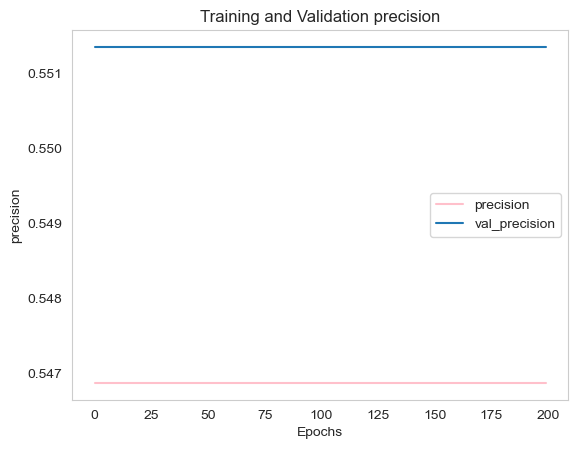

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['precision_2'], label='precision', color='pink')
plt.plot(history.history['val_precision_2'], label='val_precision')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.title('Training and Validation precision')
plt.legend()
plt.show()

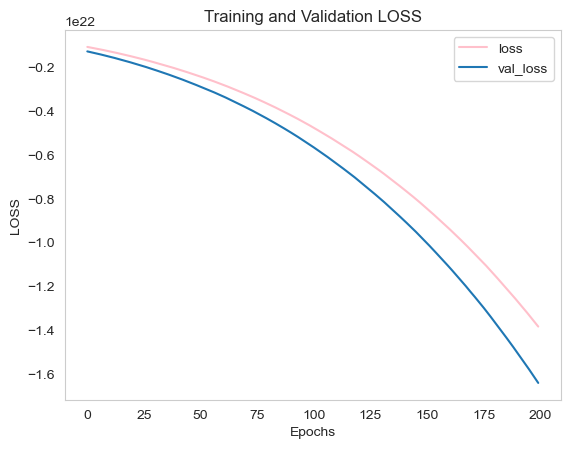

In [79]:
import matplotlib.pyplot as plt

# Plotting mae and val_mae
plt.plot(history.history['loss'], label='loss', color='pink')
plt.plot(history.history['val_loss'], label='val_loss')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.title('Training and Validation LOSS')
plt.legend()
plt.show()

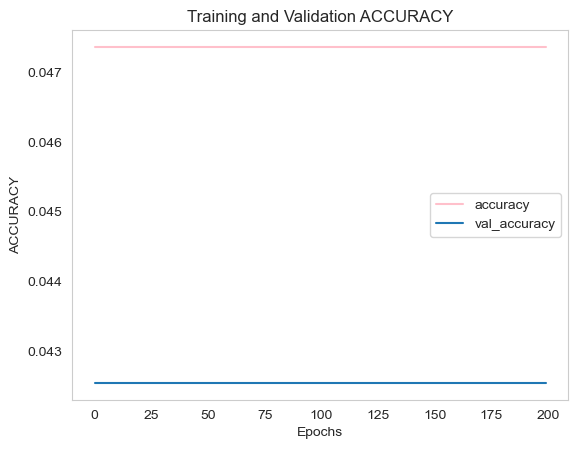

In [80]:

plt.plot(history.history['accuracy'], label='accuracy', color='pink')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.title('Training and Validation ACCURACY')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['recall_2'], label='recall', color='pink')
plt.plot(history.history['val_recall_2'], label='val_recall')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.title('Training and Validation recall')
plt.legend()
plt.show()